In [9]:
import symbolicAnalysis
import os
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import chordModel
import numpy as np

os.chdir(os.environ['JAZZ_HARMONY_DATA_ROOT'] + "/JazzHarmonyCorpus")
topTwoGrams, topNGrams, matrix = symbolicAnalysis.estimateFrequencies('ready.txt', top=100, maxNGram=20)


annotations/in_a_mellotone.json
annotations/swing_that_music.json
annotations/body_and_soul(hawkins).json
annotations/parkers_mood.json
annotations/west_end_blues.json
annotations/mean_to_me.json
annotations/minor_swing.json
annotations/indiana.json
annotations/st_thomas.json
annotations/dippermouth_blues.json
annotations/livery_stable_blues.json
annotations/i_found_a_new_baby.json
annotations/blue_horizon.json
annotations/tricotism.json
annotations/girl_from_ipanema.json
annotations/giant_steps.json
annotations/dinah.json
annotations/dinah_red_nichols.json
annotations/east_st_louis.json
annotations/cotton_tail.json
annotations/one_oclock_jump.json
annotations/these_foolish_things.json
annotations/hotter_than_that.json
annotations/potato_head_blues.json
annotations/black_bottom_stomp.json
annotations/king_porter_stomp.json
annotations/i_got_rhythm.json
annotations/dinah_fats_waller.json
annotations/west_coast_blues.json
annotations/black_and_tan_fantasy.json
annotations/walkin_shoes.js

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

# Top 100 2-grams

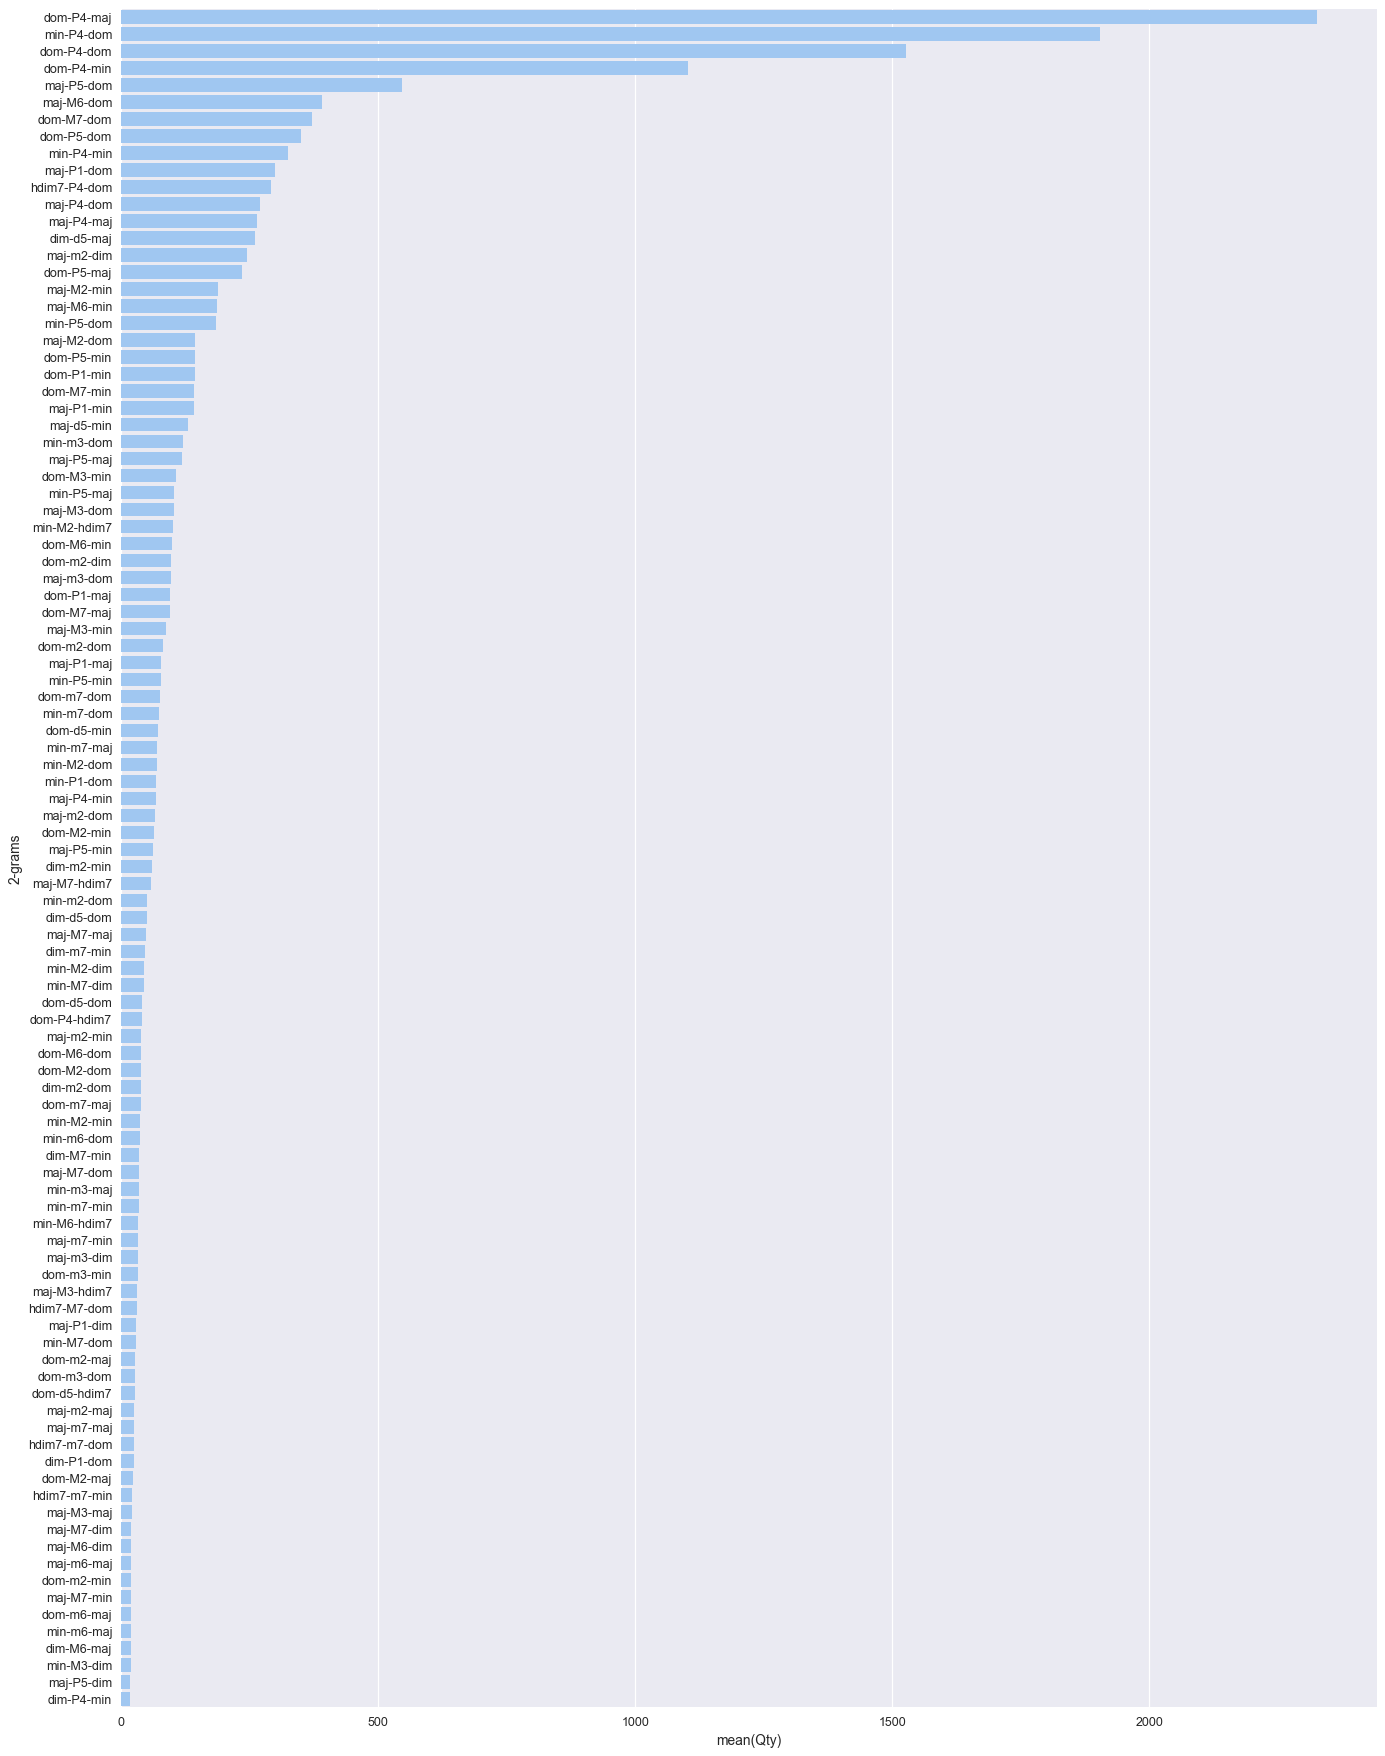

In [3]:
twoGramsFrame = pd.DataFrame({'2-grams': [x[0] for x in topTwoGrams], 'Qty': [x[1] for x in topTwoGrams]})
fig=plt.figure(figsize=(18, 25), dpi= 90, facecolor='w', edgecolor='k')
#f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("pastel")
sns.barplot("Qty", y="2-grams", data=twoGramsFrame, color="b")
plt.show()


# Top 100 N-grams

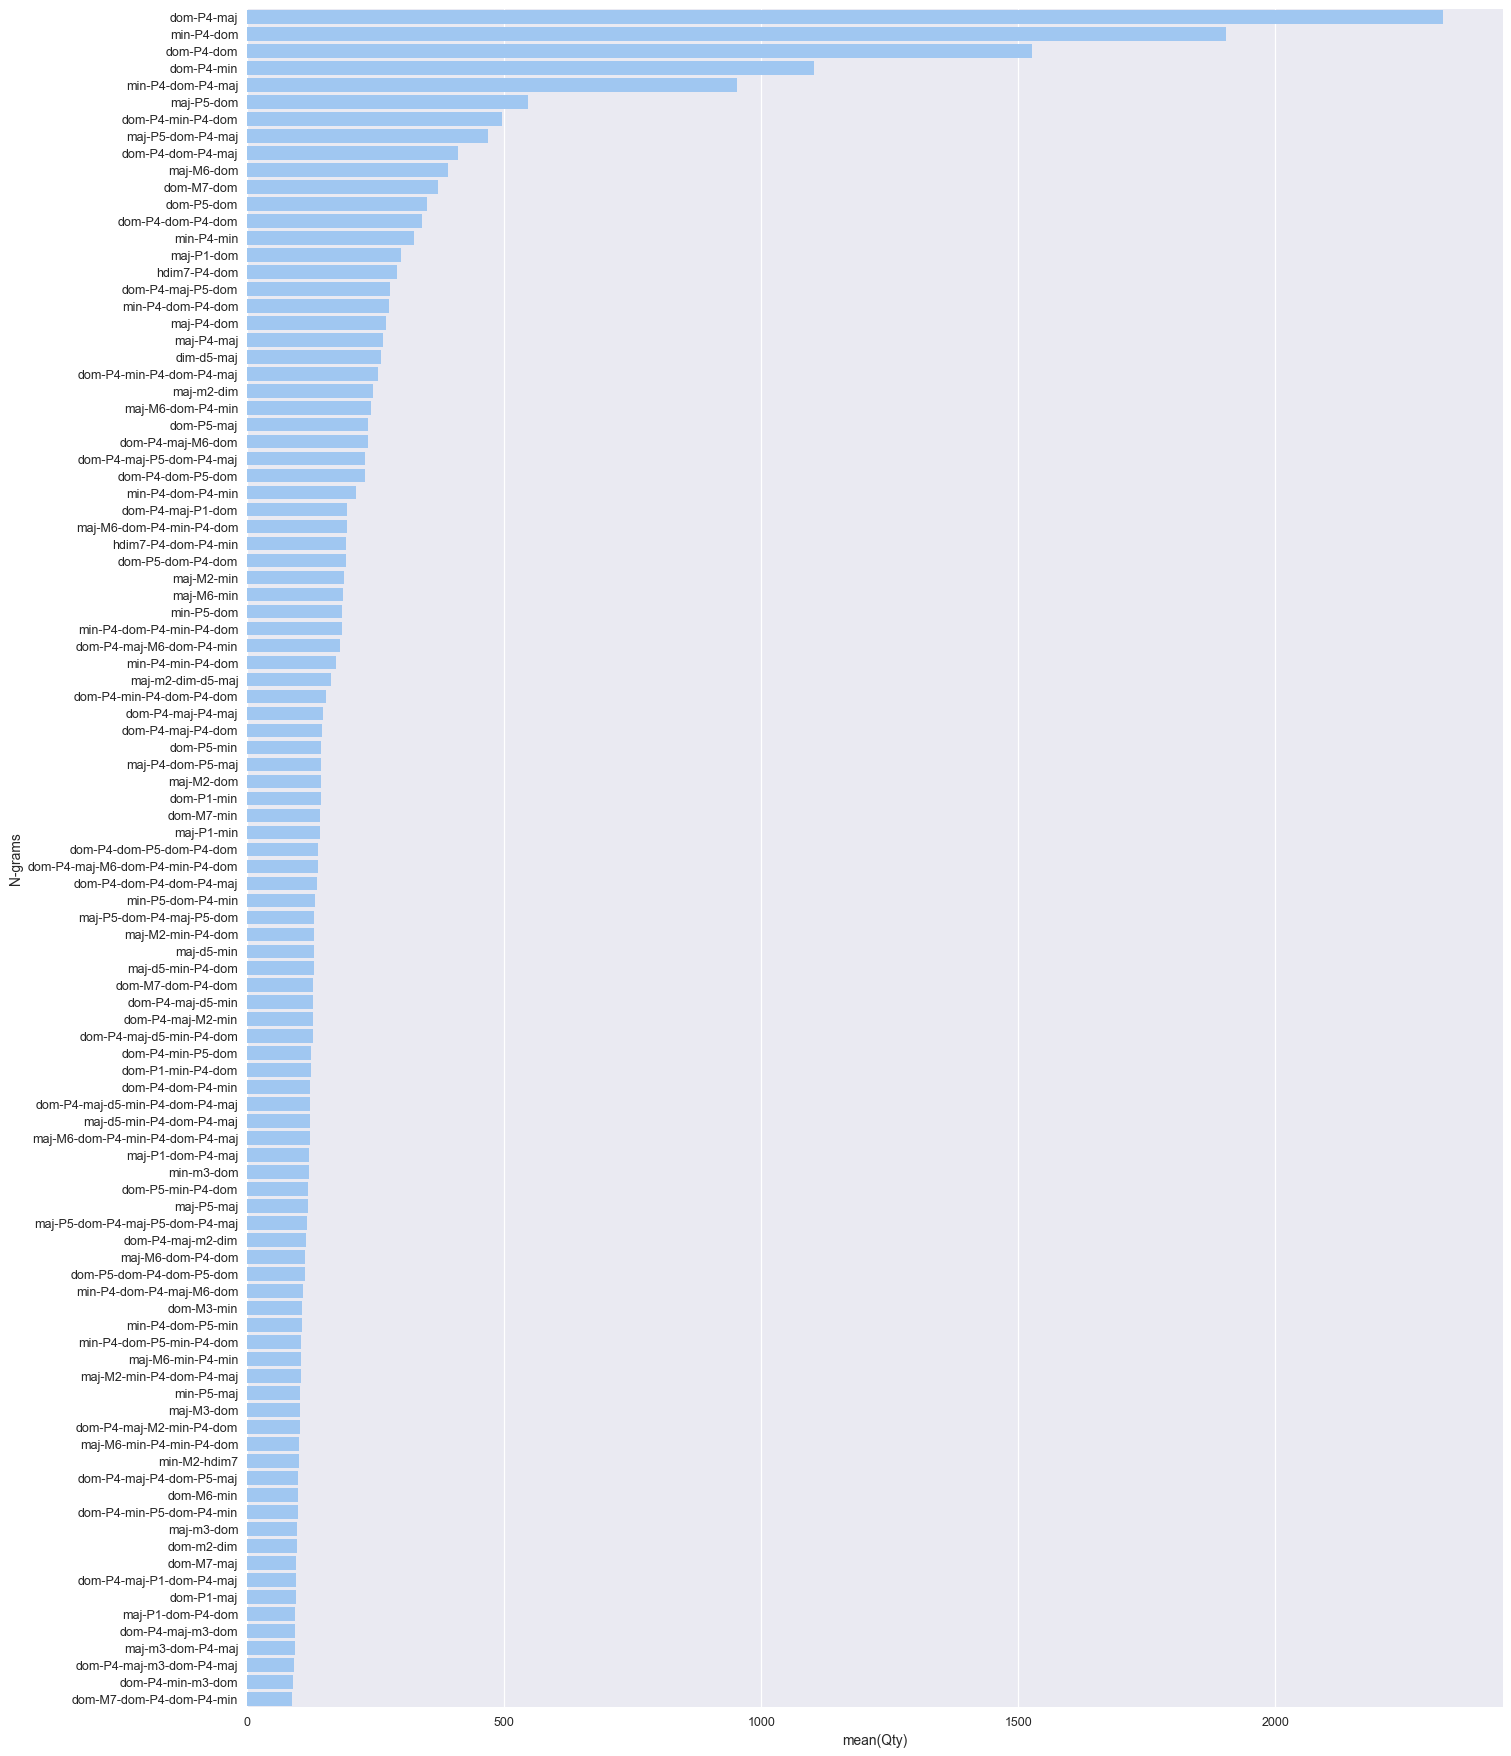

In [4]:
nGramsFrame = pd.DataFrame({'N-grams': [x[0] for x in topNGrams], 'Qty': [x[1] for x in topNGrams]})
fig=plt.figure(figsize=(18, 25), dpi= 90, facecolor='w', edgecolor='k')
#f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("pastel")
sns.barplot("Qty", y="N-grams", data=nGramsFrame, color="b")
plt.show()



# [log]Transition matrix

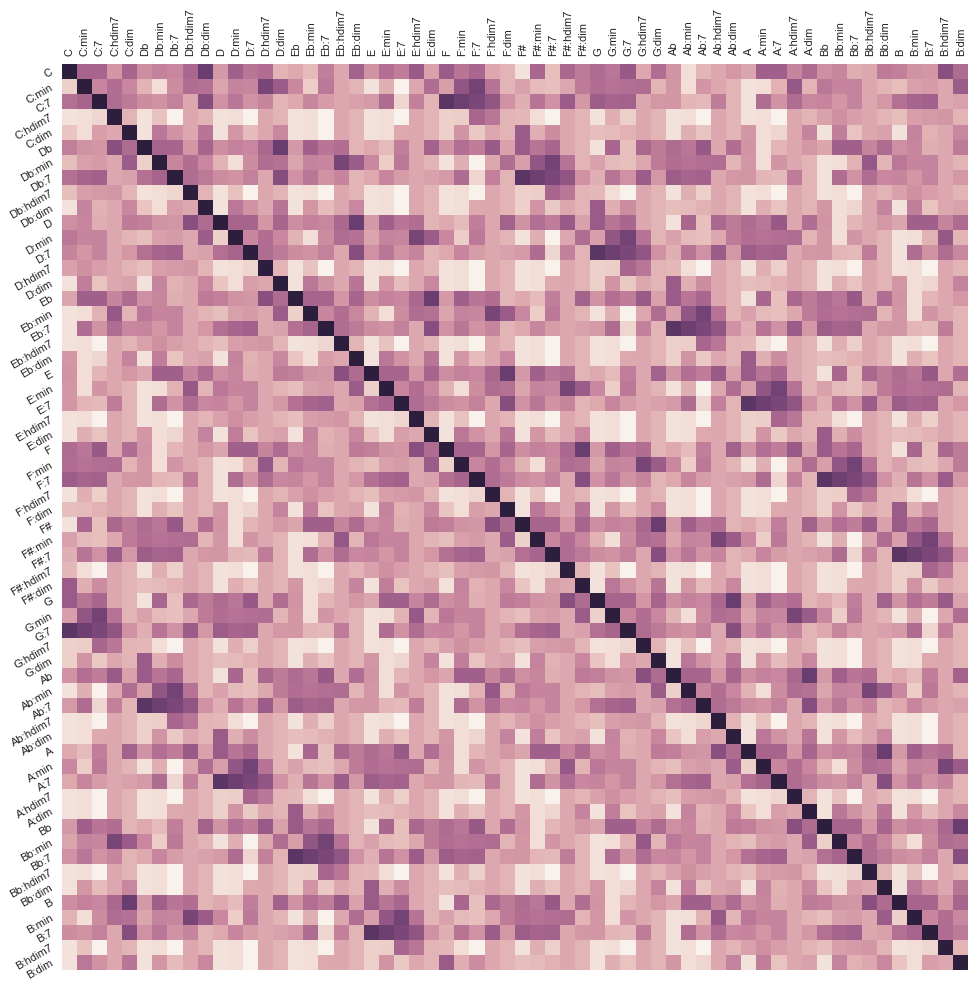

In [17]:
fig=plt.figure(figsize=(15, 15), dpi= 80, facecolor='w', edgecolor='k')
ax = sns.heatmap(np.log(matrix), cbar=False, square=True)
ax.set_xticklabels(labels=chordModel.CHORD_NAMES, rotation=90)
ax.set_yticklabels(labels=np.flip(chordModel.CHORD_NAMES, 0), rotation=30)
ax.xaxis.tick_top()

plt.show()